In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import itertools
from scipy.optimize import curve_fit, minimize
import h5py
mpl.rcParams['text.usetex'] = True
%matplotlib inline
#import random #MI: millor fes servir np.random.normal
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import pandas as pd

This download may take some time however **you can skip it** if you don't want to use LaTeX in your plots. Keep in mind that the functions provided to do the plots uses it. You will need to create a custom plot. But you know how to do it :)

In [ ]:
!apt-get install -y texlive texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
!sudo apt install texlive-fonts-extra cm-super
!sudo apt install dvipng -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis fonts-cabin
  fonts-cantarell fonts-comfortaa fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra
  fonts-font-awesome fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum
  fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode
  fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo
  fonts-noto-color-emoji fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans
  fonts-roboto-unhinted fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic
  fonts-sil-gentiumplus fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fonts-urw-base35
  li

#Importing the data set


In GitHub we have two directories with diferent nodes in their spatial dimension 16x128 and 24x128. In each directory there are several files with the correlator data from pions, protons, xi, etc.

The code provided to read the data is done for the directory 24x128 with
```
nsc=2215
```
to use 16x128 the only thing to change is
```
nsc=2001
```

The method of oppeining the data is done using an unique GoogleColab function, but you can obtain diferent functions that do the same. Just download the raw files from GitHub and copy their paths when you upload them to Colab.


Then we need to process the data and give it the wanted structure meaning that we will build the correlator matrix $C_i(t)$.

In [39]:
txt='/content/pion.txt'

#Step 1: Read the .dat file, skipping the first row (header)
df = pd.read_csv(txt, delim_whitespace=True, skiprows=1, header=None)

# Step 2: Extract only the second column, because we only need the numbers in the second column
second_column = df[1]

# Step 3: Reshape the data into a DataFrame with 2215/2001 rows and 128 columns
reshaped_df = second_column.values.reshape((2215, 128))   #or 2001

# Step 4: Keep only the first 60 columns
reshaped_df = reshaped_df[:, :60]

# Step 5: Convert the reshaped array into a DataFrame
final_df = pd.DataFrame(reshaped_df)

In [40]:
#Check that the data is correct comparing with the url
final_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.008209,0.006459,0.005780,0.005185,0.004676,0.004241,0.003869,0.003549,0.003260,0.003003,...,0.000185,0.000176,0.000168,0.000160,0.000153,0.000147,0.000142,0.000137,0.000133,0.000130
1,0.008019,0.006287,0.005609,0.005012,0.004505,0.004070,0.003694,0.003367,0.003085,0.002837,...,0.000171,0.000162,0.000154,0.000147,0.000141,0.000136,0.000131,0.000126,0.000123,0.000119
2,0.007805,0.006105,0.005443,0.004858,0.004363,0.003934,0.003562,0.003238,0.002955,0.002703,...,0.000151,0.000143,0.000136,0.000130,0.000124,0.000119,0.000114,0.000110,0.000107,0.000104
3,0.008000,0.006294,0.005619,0.005030,0.004531,0.004108,0.003745,0.003431,0.003155,0.002906,...,0.000188,0.000179,0.000170,0.000162,0.000155,0.000148,0.000143,0.000137,0.000133,0.000129
4,0.008001,0.006284,0.005627,0.005049,0.004552,0.004126,0.003763,0.003450,0.003175,0.002928,...,0.000194,0.000184,0.000176,0.000169,0.000162,0.000156,0.000150,0.000145,0.000141,0.000137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,0.007604,0.005899,0.005229,0.004645,0.004147,0.003719,0.003353,0.003038,0.002763,0.002520,...,0.000130,0.000123,0.000117,0.000112,0.000107,0.000103,0.000099,0.000095,0.000093,0.000090
2211,0.007790,0.006082,0.005415,0.004826,0.004322,0.003892,0.003521,0.003199,0.002914,0.002664,...,0.000147,0.000139,0.000132,0.000126,0.000120,0.000115,0.000110,0.000106,0.000103,0.000100
2212,0.007720,0.006022,0.005369,0.004799,0.004305,0.003878,0.003515,0.003202,0.002926,0.002683,...,0.000143,0.000136,0.000129,0.000123,0.000117,0.000112,0.000108,0.000104,0.000100,0.000097
2213,0.007921,0.006217,0.005544,0.004959,0.004459,0.004023,0.003644,0.003316,0.003032,0.002781,...,0.000153,0.000144,0.000136,0.000129,0.000123,0.000117,0.000112,0.000108,0.000104,0.000101


# Processing the data with the bootsrap and jacknife methods

There are two methods to reduce bias from a data set, the bootstrap and the jackknife. We can compute the effective mass and the correlator with both methods obtaining minor differences between them.

In [ ]:
# Defining the constants
nsc = 2215        #Number of configurations  2215/2001
nt = 60          #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

From the data frame we read the values $C_i(t)$ as:
- Each column is a time ($t_j$)
- Each row is a configuration (we have $N$ configurations)

In [ ]:
# Convert dataframe to numpy array
# This is the C_i(t) matrix size (nsc x nt)

blck = final_df.values

## Bootstrap method

From an original sample we have read $N$ configurations of the correlator $C_i(t)$.

With the bootstrap method we create $N_b$ bootstrap samples $C_b(t)$, where each one is obtained from a random selection from the original sample $N$ points (with repetitions allowed)

$$ C_b(t)=\frac{1}{N} \sum_{i=1}^{N} C_{\text{rand}(i)b}(t) $$

*Keep in mind that we want to get a random value of C for each time* $t$ *and each bootstrap sample* $b$*. The easiest way of doing it is creating a matrix* ($N \times N_b$) *with random numbers and use each element to get the* $C_{\text{rand}(i)b}(t)$.

To compute the effective mass for each bootstrap sample and its main value we use

$$ E_b=\frac{1}{t_J}\log\frac{C_b(t)}{C_b(t+t_J)} $$

with $t_J=1$ and

$$ \bar{E}(t)=\frac{1}{N_b}\sum_{b=1}^{N_b}E_b(t) $$

With this we get the effective mass for each time, and in order to compute the corresponding error we use

$$ \sigma(t)=\sqrt{\frac{N}{N_b(N-1)}\sum_{b=1}^{N_b}(E_b(t)-\bar{E}(t))^2} $$

In [ ]:
# BOOTSTRAP METHOD

# Generate random numbers
x = np.random.rand(nsc, nboot)

# Pmean_boot=C_b(t)
pmean_boot=np.zeros((nboot,nt))
for k in range(nt):
    for j in range(nboot):
        boot = 0.0
        for i in range(nsc):
            boot += blck[int(x[i, j] * nsc), k]  # blck=C_rand(i,t)= randomly C_i(t)
        pmean_boot[j, k] = boot * nsc_

# Calculate EMpoint_boot=E_b(t)
kt=1    #lag parameter
EMpoint_boot=np.zeros((nboot,nt-kt))
for k in range(nt-kt):
    for j in range(nboot):
        EMpoint_boot[j, k] = np.log(pmean_boot[j, k] / pmean_boot[j, k + kt]) / kt


# Calculate mean for each time point (Sum E_b)
mean_boot=np.zeros(nt-kt)
mean_boot = np.sum(EMpoint_boot, axis=0) * nboot_

# Calculate sigma for each time point
sigma_boot=np.zeros(nt-kt)
var_boot=np.zeros(nt-kt)
for k in range(nt-kt):
    var_boot[k] = np.sum((EMpoint_boot[:, k] - mean_boot[k]) ** 2) * nboot_ * nsc * nsc1_
sigma_boot = np.sqrt(var_boot)

## Jacknife

Considering an original sample containing $N$ configurations, the jackknife samples are constructed by taking the average of the variable $x$ without including the $n$th sample

$$ x_n^J =\frac{1}{N-1}\sum_{m\neq n}x_m =\frac{N}{N-1}\bar{x}-\frac{1}{N-1}x_n $$

Then the mean value of the function $f$ and estimation of its uncertainty is evaluated as:

$$ f(X)\simeq \bar{f}_x^J=\frac{1}{N}\sum_{n=1}^N f(x_n^J) $$
$$ \sigma_{f(X)}^2 \simeq \frac{N-1}{N}\sum_{n=1}^N [f(n_n^J)-\bar{f}_x^J]^2 $$

*An easy way of doing so is computing the mean of* $C_i(t) → \bar{C}(t)$ *and create a similar matrix to* $C_b(t)$ *by:*
$$C_{jack}(t)=\frac{N\bar{C}(t)-C_i(t)}{N-1}$$
*Notice that this is what you have above in terms of* $x$. *You can proceed as in the bootstrap method but with this new* $C_{jk}(t)$ *instead of* $C_b(t)$. *Take in consideration the dimensions. Here you are not using* $N_b$.

In [ ]:
# JACKNIFE METHOD

# Mean for each time (column)
pmean=np.zeros(nt)
for k in range(nt):
    pm=0.0
    for i in range(nsc):
        pm+=blck[i,k]
    pmean[k] = pm * nsc_

# Pmean_jk
pmean_jk=np.zeros((nsc,nt))
for k in range(nt):
    for j in range(nsc):
        pmean_jk[j, k] = (pmean[k] * nsc - blck[j, k]) * nsc1_


# Calculate EMpoint_jk
kt=1
EMpoint_jk=np.zeros((nsc,nt-kt))
for k in range(nt-kt):
    for j in range(nsc):
        EMpoint_jk[j, k] = np.log(pmean_jk[j, k] / pmean_jk[j, k + kt]) / kt

# Calculate mean for each time point (Sum E_b)
mean_jk=np.zeros(nt-kt)
mean_jk = np.sum(EMpoint_jk, axis=0) * nsc_

# Calculate sigma for each time point
sigma_jk=np.zeros(nt-kt)
var_jk=np.zeros(nt-kt)
for k in range(nt-kt):
    var_jk[k] = np.sum((EMpoint_jk[:, k] - mean_jk[k]) ** 2) * nsc_ * (nsc - 1)
sigma_jk = np.sqrt(var_jk)

## Correlator

We compute the mean and sigma correlator with both the bootstrap and the jacknife method.

* The mean of the correlator for each method in the mean of $C_b(t)$ at each time.

* The mean of the correlator for each method in the mean of $C_{jack}(t)$ at each time.

The variance is computed as usual.

In [ ]:
# Compute mean and standard deviation of the correlator
# For the bootstrap
mcor_boot = np.mean(pmean_boot[:,:-1], axis=0)
vcor_boot = np.mean((pmean_boot[:,:-1] - mcor_boot) ** 2, axis=0) * nsc * nsc1_
scor_boot = np.sqrt(vcor_boot)

# For the jacknife
mcor_jk = np.mean(pmean_jk[:,:-1], axis=0)
vcor_jk = np.mean((pmean_jk[:,:-1] - mcor_jk) ** 2, axis=0) * nsc * nsc1_
scor_jk = np.sqrt(vcor_jk)

### Plot function

Here we provide a function for the plots. You can use it or not. If you do install the LaTeX package.

In [ ]:
# Plot data
def plot_data(x_data, y_data_list, y_err_list, plot_title, xlabel, ylabel, xlim, scale, y_leg_list, legend, fit_line=None, fill_between=None):
    # Configure plot settings
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size='12')

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)

    ax.set_title(plot_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_yscale(scale)
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

    # Plot each dataset with error bars
    for i, (y_data, y_err, y_leg) in enumerate(zip(y_data_list, y_err_list, y_leg_list)):
        ax.errorbar(x_data, y_data, yerr=y_err, fmt='o', markersize=3, capsize=1, elinewidth=0.7, label=y_leg)

    if fit_line is not None:
        ax.plot(fit_line[0], fit_line[1], 'r-', label=f'fit: {fit_line[2]}')

    if fill_between is not None:
        ax.fill_between(fill_between[0], fill_between[1], fill_between[2], color='#ffcccc')

    if legend:
        ax.legend()

    # Display the plot
    plt.show()


Here you should plot the effective mass, the variance and the correlator as functions of time for both methods.

A plot example using the function provided:


```
plot_data(
    x_data=np.arange(x_size),
    y_data_list=[value1, value1],
    y_err_list=[sigma1, sigma2],
    plot_title='Title',
    xlabel=r'$x \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{y} \,\mathrm{(l.u.)}$',
    xlim=[x0, x1],
    ylim=[y0, y1],
    scale='linear',
    y_leg_list=['Leg1', 'Leg2'],
    legend=True
)
```



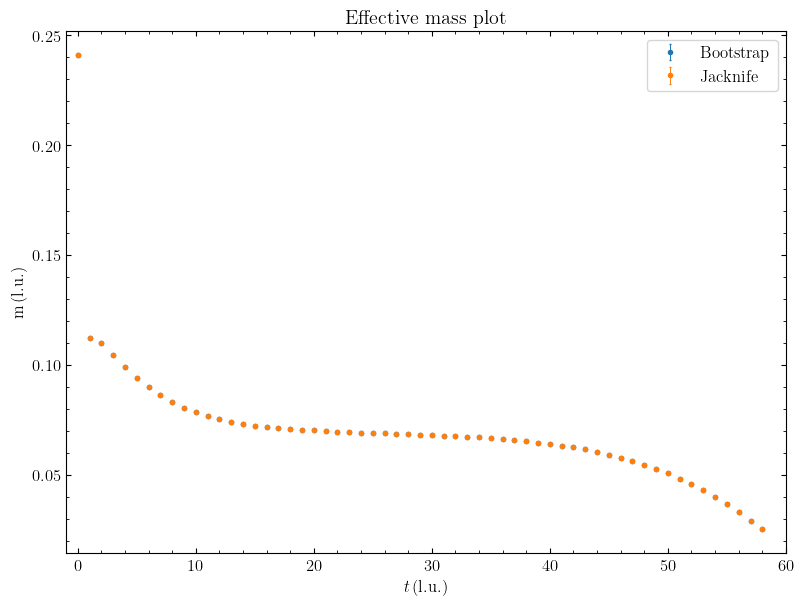

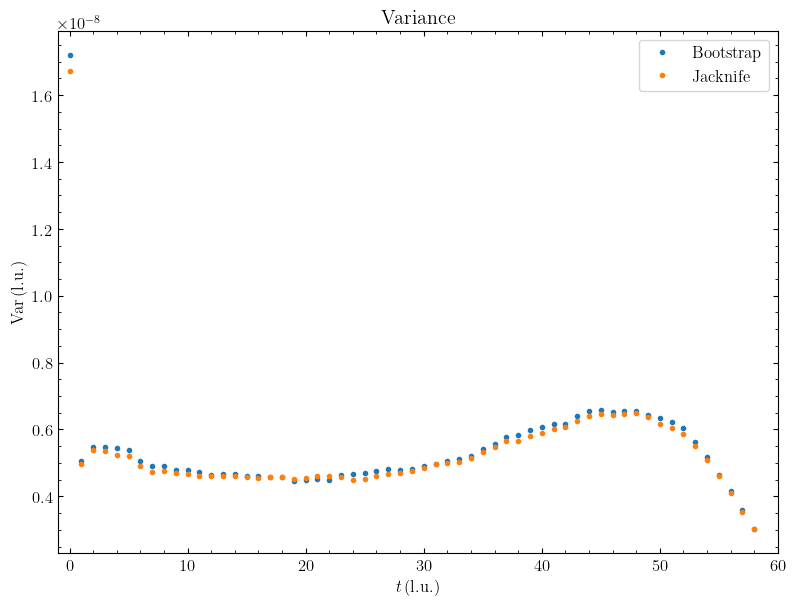

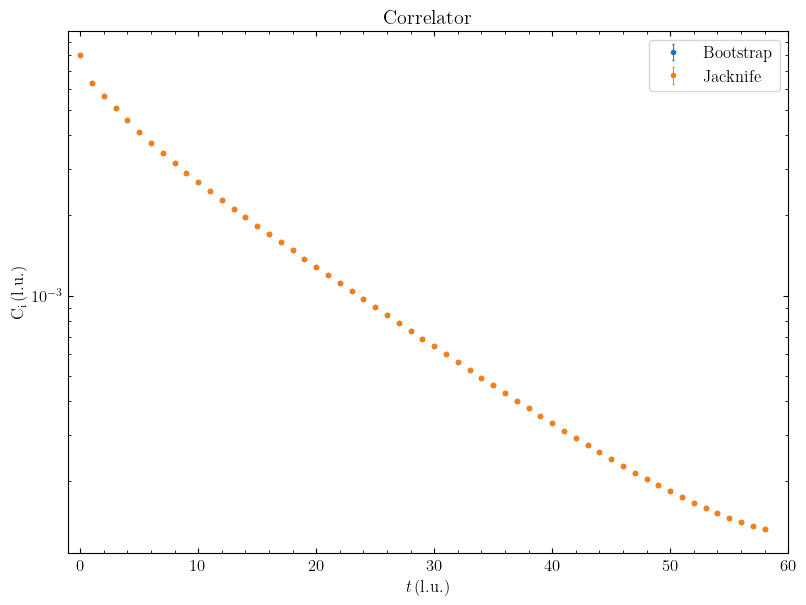

In [ ]:
# Plot results m(t)
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mean_boot, mean_jk],
    y_err_list=[sigma_boot, sigma_jk],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, nt],
    scale='linear',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

# Plot results variance
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[var_boot, var_jk],
    y_err_list=[None, None],
    plot_title='Variance',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{Var} \,\mathrm{(l.u.)}$',
    xlim=[-1, nt],
    scale='linear',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

# Plot results correlator
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mcor_boot, mcor_jk],
    y_err_list=[scor_boot, scor_jk],
    plot_title='Correlator',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{C_i} \,\mathrm{(l.u.)}$',
    xlim=[-1, nt],
    scale='log',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

## Comparing some data

The same that we have did, can be done comparing different data. A way of proceeding is setting the bootstrap and jacknife methods as functions and apply them to diferent urls.


In [ ]:
# Uning a function for the bootstrap method:

def mean_sigma_boot(blck,nsc,nt,nboot):
    # Compute pmean using the numpy function mean for the nsc axis
    pmean=np.zeros((nboot,nt))
    pmean = np.mean(blck, axis=0)

    # Bootstrap sampling
    # Generate bootstrap indices
    pmeanboot=np.zeros((nboot,nt))
    x = np.random.uniform(size=(nsc, nboot))
    for k in range(nt):
        for j in range(nboot):
            for i in range(nsc):
                pmeanboot[j,k]+=blck[int(x[i,j]*nsc),k]
            pmeanboot[j,k]*=nsc_

    # Compute EMpoint
    kt = 1
    EMpoint=np.zeros((nboot,nt-kt))
    EMpoint = np.log(pmeanboot[:, :-kt] / pmeanboot[:, kt:]) / kt   # Shape (nboot, nt - kt)/Shape (nboot, nt - kt)

    # Compute mean and standard deviation of EMpoint
    mean = np.mean(EMpoint, axis=0)
    variance = np.mean((EMpoint - mean) ** 2, axis=0) * nsc * nsc1_
    sigma = np.sqrt(variance)

    # Compute mean and standard deviation of the correlator
    E_b=EMpoint.T

    mean_cor = np.mean(pmeanboot[:,:-1], axis=0)
    variance_cor = np.mean((pmeanboot[:,:-1] - mean_cor) ** 2, axis=0) * nsc * nsc1_
    sigma_cor = np.sqrt(variance_cor)

    return mean, sigma, mean_cor, sigma_cor, E_b

In [ ]:
# Define a function to read different data

def read_data(filename):
    df = pd.read_csv(filename, delim_whitespace=True, skiprows=1, header=None)
    second_column = df[1]
    reshaped_df = second_column.values.reshape((2215, 128))
    reshaped_df = reshaped_df[:, :60]
    final_df = pd.DataFrame(reshaped_df)

    return final_df

In [41]:
# Defining the constants
nsc = 2215       #Number of configurations. 2215/2001
nt = 60          #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)


# Other data sets
txt_prot = '/content/proton.txt'
txt_xi = '/content/cascade.txt'
txt_2pi = '/content/2pion.txt'
txt_2prot = '/content/2proton.txt'

In [ ]:
# Reading again the data in case we need to change it:

df_pi = read_data(txt)
df_prot = read_data(txt_prot)
df_xi = read_data(txt_xi)
df_2pi = read_data(txt_2pi)
df_2prot = read_data(txt_2prot)


# Convert dataframe to numpy array
blck_pi = df_pi.values
blck_prot = df_prot.values
blck_xi = df_xi.values
blck_2pi = df_2pi.values
blck_2prot = df_2prot.values

# Compute the mean and sigma for the mass and for the correlator. We use the same values for nsc, nt and nboot
mean_pi, sigma_pi, mcor_pi, scor_pi, E_pi = mean_sigma_boot(blck_pi, nsc, nt, nboot)
mean_prot, sigma_prot, mcor_prot, scor_prot, E_prot = mean_sigma_boot(blck_prot, nsc, nt, nboot)
mean_xi, sigma_xi, mcor_xi, scor_xi, E_xi = mean_sigma_boot(blck_xi, nsc, nt, nboot)
mean_2pi, sigma_2pi, mcor_2pi, scor_2pi, E_2pi = mean_sigma_boot(blck_2pi, nsc, nt, nboot)
mean_2prot, sigma_2prot, mcor_2prot, scor_2prot, E_2prot = mean_sigma_boot(blck_2prot, nsc, nt, nboot)

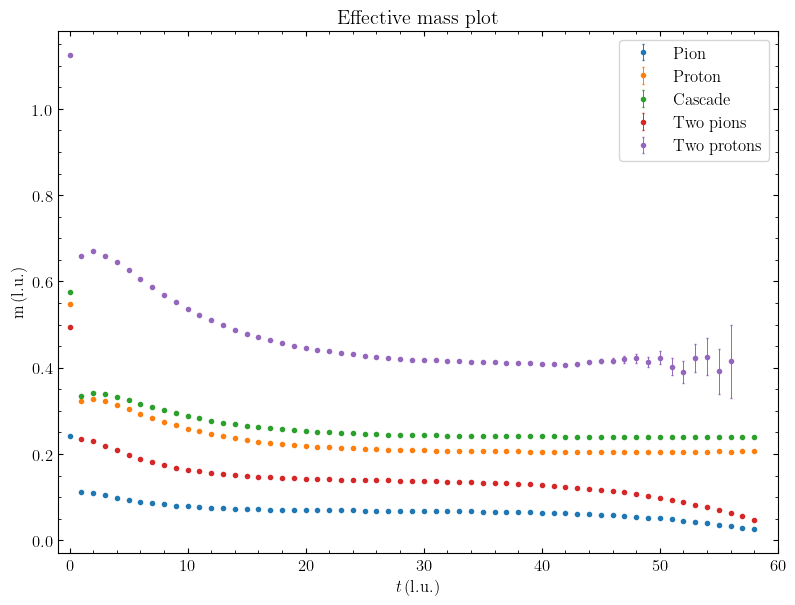

In [45]:
# Plot results m(t)
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mean_pi, mean_prot, mean_xi, mean_2pi, mean_2prot],
    y_err_list=[sigma_pi, sigma_prot, sigma_xi, sigma_2pi, sigma_2prot],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, 60],
    scale='linear',
    y_leg_list=['Pion', 'Proton', 'Cascade', 'Two pions', 'Two protons'],
    legend=True
)

# Fitting the data

Choosing the data to fit



In [48]:
# Defining the constants
nsc = 2215        #Number of configurations. 2215/2001
nt = 60           #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

# Data computed for the pion example
E_b=E_pi
xboot=np.arange(nt-1)
yboot=mean_pi
eboot=sigma_pi
xboot_cor=np.arange(nt-1)
yboot_cor=mcor_pi
eboot_cor=scor_pi

## Linear and exponential fits

With the effective mass plotted we could mke some fits to obtain it.

By looting at the plot we set the time interval in which we will make the fit.

We compute two fits:

$$ f_l(t)=k \hspace{2cm} f_e(t)=ae^{-bt}+c $$

The linear form assumes that we are in the plateaux region, with no excited state contribution. The exponential one takes into account, additionally, one contribution from an excited state, which in principle allows us to start the fit at earlier times. But for the sake of simplicity we will use the same time interval for both.

We can also compute the corresponding $\chi^2$ using:

$$ \chi^2=\sum_{t,t'}[\bar{E}(t)-f(t)](cov(t,t'))^{-1}[\bar{E}(t')-f(t')] $$

where $cov(t,t')$ is the covariance matrix

$$ cov(t,t')=\frac{N}{N-1}\frac{1}{N_b}\sum_{b=1}^{N_b}[E_b(t)-\bar{E}(t)][E_b(t')-\bar{E}(t')] $$

In order to obtain the parameters of the fit we have to minimize the $\chi^2$. A way to do so is creating a function for the $\chi^2$ and using $\texttt{minimize( )}$ with some initials guesses for the parameters.

In [49]:
# Fit functions
def func_l(t, d):
    return d

def func_e(t, a, b, c):
    return a * np.exp(-b * t) + c

def func_e2(t, c):
    return c[0] * np.exp(-c[1] * t) + c[2]


In [50]:
# Compute the covariance matrix
cov_t=np.zeros((nt-1,nt-1))
for l in range(0,nt-1): #l rows of cov, t
    for c in range(0,nt-1): #c columns of cov, t'
        sum=0
        for p in range(0,nboot): #sumatori de les b per acada element de la matriu t,t'
            sum+=(E_b[l][p]-yboot[l])*(E_b[c][p]-yboot[c])
        cov_t[l][c]=sum*(nsc/(nsc-1))/nboot
cov_t=np.array(cov_t)

In [59]:
#Time interval
i=12
f=30

j=f-i+1
# Covariant matrix
cov=cov_t[i-1:f,i-1:f]
cov_=np.linalg.inv(cov)     #invers


fun_chi_l = lambda c: np.sum([
    (yboot[x-1] - func_l(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_l(y-1, c))
    for n, x in enumerate(range(i, f + 1))
    for m, y in enumerate(range(i, f + 1))
])

fun_chi_e = lambda c: np.sum([
    (yboot[x-1] - func_e2(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_e2(y-1, c))
    for n, x in enumerate(range(i, f + 1))
    for m, y in enumerate(range(i, f + 1))
])

# Guess starting points
c0=[0.1]

x0=[0.,1.,0.1]
bnds=((0.,1.),(-20.,20.),(-3.,3.))

#Lineal
res_l=minimize(fun_chi_l,c0,method='Nelder-Mead',tol=1e-6)
c_l=res_l.x
central_l=c_l[0]
fit_l=c_l
#Exponential
res_e=minimize(fun_chi_e,x0,method='Nelder-Mead',bounds=bnds,tol=1e-6)
c_e=res_e.x
central_e=c_e[2]
fit_e=c_e


dof_l=j-1
dof_e=j-3
chi2_l=fun_chi_l(res_l.x[0])/dof_l
chi2_e=fun_chi_e(res_e.x)/dof_l


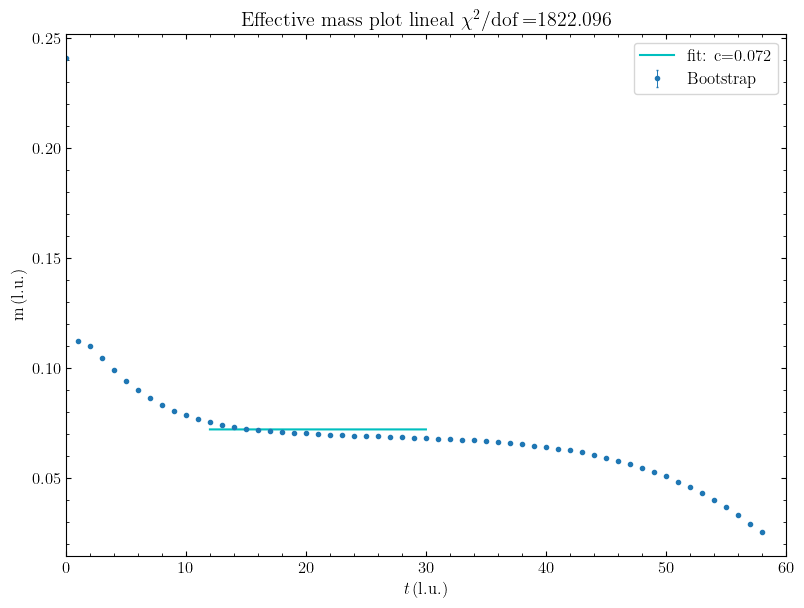

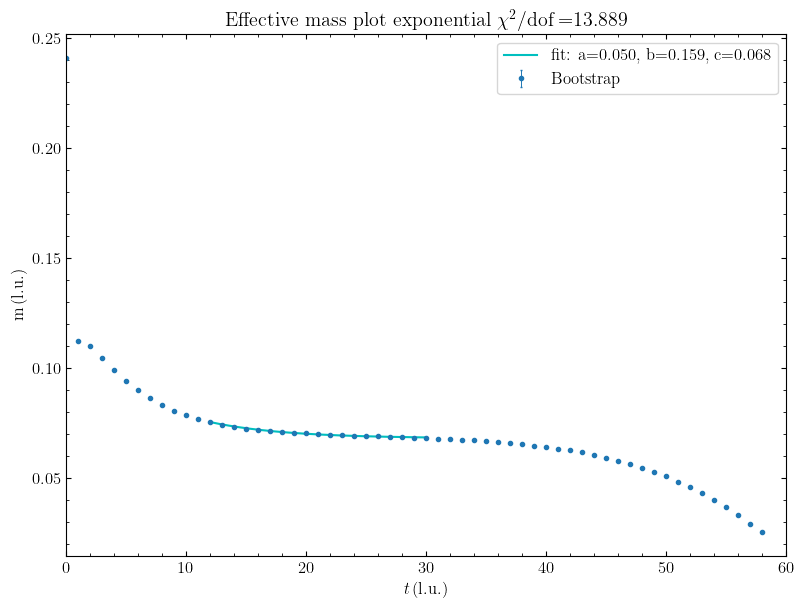

In [60]:
# Plot the fits
xplot=np.linspace(i,f,num=(f-i)*100)
yplot_l=[]
for num in range(0,(f-i)*100):
    yplot_l.append(func_l(xplot, c_l[0]))
yplot_e=func_e(xplot, c_e[0],c_e[1],c_e[2])

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)


#PLOT LINEAL
fig1 = fig.add_subplot(1,1,1)
fig1.set_title('Effective mass plot lineal $\mathrm{\chi^2/dof}$\,=%5.3f' % chi2_l)
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_xlim([0,nt])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, ls='None', marker='o', markersize=3, capsize=1, elinewidth=0.7,label="Bootstrap")

#Plot del ajust
plt.plot(xplot, yplot_l, 'c-', label='fit: c=%5.3f' % tuple(c_l))

plt.legend()
plt.show()

#PLOT EXPONENTIAL
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)
fig1 = fig.add_subplot(1,1,1)

fig1.set_title('Effective mass plot exponential $\mathrm{\chi^2/dof}$\,=%5.3f' % chi2_e)
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_xlim([0,nt])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, ls='None', marker='o', markersize=3, capsize=1, elinewidth=0.7,label="Bootstrap")
#Plot del ajust
plt.plot(xplot, yplot_e, 'c-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(c_e))

plt.legend()
plt.show()

### Choosing the best fit

**You don't have to do this**

Ideally we would like to repeat the fits for several time intervals and find the best parameters. They would be the ones that minimize $\chi^2/\text{dof}$, where $\text{dof}$ are the degrees of freedom in each fit (sample size minus number of parameters fitted).

Then with this we would obtain the central values for the parameters $\bar{k}$ and $\bar{a}$, $\bar{b}$, $\bar{c}$ for each time range. To obtain their uncertainty we repeat the same steps but minimizing

$$ \chi_b^2=\sum_{t,t'}[E_b(t)-f(t)](cov(t,t'))^{-1}[E_b(t')-f(t')] $$

where the mean value of the effective energy $\bar{E}(t)$ is replaced by the effective mass of each bootstrap sample $b$, $E_b(t)$.

We obtain $N_b$ values for {k} and {a,b,c} that minimize this equation for each value of $b \in (1,Nb)$. In order to obtain the statistical uncertainty, we proceed to use

$$ \sigma_x=\frac{q_{5/6}(x_b-\bar{x})-q_{1/6}(x_b-\bar{x})}{2} $$

where $x_b$ are the values of $k$ (or $c$) which minimize each $\chi_b^2/\text{dof}$, $\bar{x}$ the value of $k$ (or $c$) that minimizes $\chi^2/\text{dof}$ and $q_n$ the $n$th quantile.

The best fit will be the one with smallest $\chi^2/\text{dof}$ from among all the fits obtained for different time ranges.

Finally, we assign a systematic uncertainty, $\sigma_\text{syst}$, calculated as the biggest difference between the central value $\bar{k}$ (or $\bar{c}$) of each fit and the central value of the best fit. Statistical and systematic uncertainties are
combined in quadrature to obtain the total uncertainty

$$\sigma_t = \sqrt{\sigma_\text{stat}^2 + \sigma_\text{syst}^2}$$

